#Adding Required Libraries

In [1]:
!pip install matplotlib --upgrade

In [2]:
!pip install tensorflow --upgrade

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Upload Data Set

In [4]:
train = pd.read_csv("COVID19_train_N1_S3.csv",encoding='ISO-8859-1')
test = pd.read_csv("COVID19_test_N1_S3.csv",encoding='ISO-8859-1')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41159 entries, 0 to 41158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41158 non-null  object
 1   Sentiment      41156 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB


In [6]:
train.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative


#Cleaning Data Set

##Deleting Nan Rows

In [7]:
train.isnull().sum(axis = 0)

OriginalTweet    1
Sentiment        3
dtype: int64

In [8]:
test.isnull().sum(axis = 0)

OriginalTweet    0
Sentiment        0
dtype: int64

In [9]:
train.dropna(subset = ["OriginalTweet"],inplace= True)
train.dropna(subset = ["Sentiment"],inplace= True)

Before cleaning the Dataset, let's perform a normalization process that we forgot about. Also some tweets have multiple question marks we should normalize this tweets too.

##Normalizing non-ascii characters

In [10]:
def remove_non_ascii(tweet):
    return "".join(c for c in tweet if ord(c)<128)

In [11]:
tweet = "covid-19 wonÃ¢Ât be similar to the great recession unless unemployment ?? amp; stays ??. at the eod, if the gov steps up for the consumer amp; business, people will still have income. if itÃ¢Âs necessary to curb activity to beat covid-19, a (temp) gdp retraction shouldnÃ¢Ât be a surprise."
print("Tweet Before\n",tweet)
tweet = remove_non_ascii(tweet)
print("Tweet After\n",tweet)

Tweet Before
 covid-19 wonÃ¢Ât be similar to the great recession unless unemployment ?? amp; stays ??. at the eod, if the gov steps up for the consumer amp; business, people will still have income. if itÃ¢Âs necessary to curb activity to beat covid-19, a (temp) gdp retraction shouldnÃ¢Ât be a surprise.
Tweet After
 covid-19 wont be similar to the great recession unless unemployment ?? amp; stays ??. at the eod, if the gov steps up for the consumer amp; business, people will still have income. if its necessary to curb activity to beat covid-19, a (temp) gdp retraction shouldnt be a surprise.


In [12]:
def remove_mult_QM(tweet):
  if tweet.count('?') > 5:
    return tweet.replace('?','')
  else:
    return tweet

In [13]:
tweet = "join us for brunel's second public webinar on thursday 02 april, 11am. presented by ?? ????????? ?????, we explore '???????? ??????, ????? ??? ???????????' register here ??"
print("Tweet Before\n",tweet)
tweet = remove_mult_QM(tweet)
print("Tweet After\n",tweet)

Tweet Before
 join us for brunel's second public webinar on thursday 02 april, 11am. presented by ?? ????????? ?????, we explore '???????? ??????, ????? ??? ???????????' register here ??
Tweet After
 join us for brunel's second public webinar on thursday 02 april, 11am. presented by   , we explore ' ,   ' register here 


In [14]:
def remove_mult_spaces(tweet):
#Some tweets consist of only ?. That is why the try except structure was used.
  try:
    return re.sub("\s\s+" , " ", tweet)
  except:
    return tweet

In [15]:
def normalize(tweet):
  tweet = remove_non_ascii(tweet)
  tweet = remove_mult_QM(tweet)
  tweet = remove_mult_spaces(tweet)
  return tweet

In [16]:
tweet = "This is a test tweet ???????"
print("Tweet Before\n",tweet)
tweet = normalize(tweet)
print("Tweet After\n",tweet)

Tweet Before
 This is a test tweet ???????
Tweet After
 This is a test tweet 


In [17]:
for i in range(len(train)):
  train.iloc[i]["OriginalTweet"] = normalize(train.iloc[i]["OriginalTweet"])

In [18]:
for i in range(len(test)):
  test.iloc[i]["OriginalTweet"] = normalize(test.iloc[i]["OriginalTweet"])

##Tweet Lenghts

In [19]:
train_lens = []
for tweet in train["OriginalTweet"]:
  tweet_len = len(tweet.split())
  train_lens.append(tweet_len)
train["tweet_len"] = train_lens

In [20]:
test_lens = []
for tweet in test["OriginalTweet"]:
  tweet_len = len(tweet.split())
  test_lens.append(tweet_len)
test["tweet_len"] = test_lens

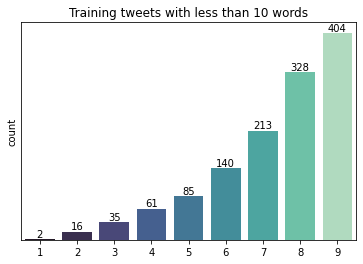

In [21]:
ax = sns.countplot(x='tweet_len',data=train[train['tweet_len']<10], palette='mako')
plt.title('Training tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [ ]:
ax = sns.countplot(x='tweet_len',data=test[test['tweet_len']<10], palette='mako')
plt.title('Testing tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [23]:
data=train[train['tweet_len']<4]
data.head(len(data))

,OriginalTweet,Sentiment,tweet_len
7259,Coronavirus...Better...Netizens...Mockery...Mo...,Positive,2
7260,US...Impose...New...Iran...Link...Sanctions......,Positive,2
9073,Stop Fucking Hoarding,Negative,3
9163,Reality check indeed,Neutral,3
9167,Meanwhile at home,Neutral,3
9516,Unintended consequences...\r\r\n\r\r\nhttps://...,Neutral,3
9776,Be like Bob,Positive,3
12047,only in France,Neutral,3
12399,Seems about right,Neutral,3
12716,Stay safe everyone,Positive,3


There is data in the dataset from which words are separated using "...". We will correct them for future normalizations, but this time we will just deleting them.

In [24]:
train = train[train["tweet_len"]>4]

In [25]:
data=test[test['tweet_len']<4]
data.head(len(data))

,OriginalTweet,Sentiment,tweet_len
2208,Good morning https://t.co/M0nLmwnBX7,Positive,3
3368,Selfish wankpuffins,Negative,2


In [26]:
test = test[test["tweet_len"]>4]

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41041 entries, 0 to 41158
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41041 non-null  object
 1   Sentiment      41041 non-null  object
 2   tweet_len      41041 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


#BERT

##Adding Required Libraries

In [28]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 12.1 MB/s 
     |████████████████████████████████| 61 kB 465 kB/s 
     |████████████████████████████████| 3.3 MB 46.3 MB/s 
     |████████████████████████████████| 895 kB 40.9 MB/s 
     |████████████████████████████████| 596 kB 36.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [29]:
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
from tensorflow import keras

import numpy as np

import re,string

##Tokenizing

In [30]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [33]:
train_token_lens = []
total = 0
for i,tweet in enumerate(train["OriginalTweet"].values):
    tokens = tokenizer.encode(tweet, max_length=512, truncation=True)
    train_token_lens.append(len(tokens))
    if len(tokens)>100:
        print(f"INDEX: {i}, TOKEN: {len(tokens)}, TEXT:\n{tweet}")
        total += 1
print("Total of tweets: ",total) 
print("Max Token Lenght:",np.max(train_token_lens))

INDEX: 42, TOKEN: 107, TEXT:
CHECK VIDEO ?? https://t.co/1ksn9Brl02 ??No food ? in USA market due to coronavirus panic we gonna die from starvation #CoronavirusOutbreak #coronavirus #houston #nofood #Notoiletpaper #NoHandShakes #nohandsanitizer #COVID19 #pandemic #totallockdown #COVID2019usa #walmart https://t.co/ztN3iMkgpD
INDEX: 72, TOKEN: 104, TEXT:




#seafood #coronavirus #CoronavirusOutbreak #CoronavirusReachesDelhi #Coronavid19 #CoronaVirusUpdates #COVID2019 #COVID19 #JhalakBollywood #JhalakKollywood #JhalakTollywood https://t.co/U5Dg3LoFYG
INDEX: 185, TOKEN: 107, TEXT:
@olson_jessie @NashTerrance @MccrorieJim @ArmyVet1775 @rogerscarmen @AliM20698746 @jimbo_always @bill_wrights @ddcampassr @JewelsJones1 @real_pat_henry @WeSeeYouWeKnow @____54_____ @RandallKraft @DatoFreddy @LennyInnecken6 @SanMateogirl11 @brandyls76 @Spa
INDEX: 195, TOKEN: 115, TEXT:



Apply: https://t.co/w2VJdOwRcg https://t.co/sP6sTraxLQ
INDEX: 457, TOKEN: 110, TEXT:











(some titles are geo-blocked) 

As it can be seen, these tweets do not contain English or contain a lot of meaningless words and symbols. This data will slow down the operation of the algorithm and reduce its efficiency. For this reason, we will drop this data from the data set.

In [34]:
train["Token_lens"] = train_token_lens

In [35]:
train = train[train["Token_lens"]<100]

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40590 entries, 0 to 41158
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  40590 non-null  object
 1   Sentiment      40590 non-null  object
 2   tweet_len      40590 non-null  int64 
 3   Token_lens     40590 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


In [37]:
test_token_lens = []
total = 0
for i,tweet in enumerate(test["OriginalTweet"].values):
    tokens = tokenizer.encode(tweet, max_length=512, truncation=True)
    test_token_lens.append(len(tokens))
    if len(tokens)>100:
        print(f"INDEX: {i}, TOKEN: {len(tokens)}, TEXT: {tweet}")
        total += 1
print("Total of tweets: ",total)  





#hand #hands #keyboard #corona #coronavirus #COVID19 #photooftheday #stockphotography #stockphoto #photosforsale #SanFrancisco https://t.co/p1uPPtnxFz
INDEX: 236, TOKEN: 108, TEXT: So, according to this dude if you eat Rama margarine, leaver spread, Koo Beans, #CoronaVirus checks into your system &amp; if it doesnt like the food you eat, the virus checks out &amp; may host itself into someone that eats like ciabatta. So stock up on Koo Beans #CoronaVirusInSA https://t.co/jQSmBxpXs7 https://t.co/7z8Ff2jHY5



My b


?:Kelvin@bertriconcontainers.com jkia #UhuruKenyatta Ksh 500 #PassarisAbortionKills baringo embu Kenya airways #Covid_19 #PressPass https://t.co/qNi6tChS62
INDEX: 525, TOKEN: 111, TEXT: $SPY GO OUT AND STOCK UP ON FOOD AND WATER PEOPLE!!! BETTER SAFE THAN SORRY! $SPX $QQQ $IWM $DJI $AAPL $TSLA $FB $AMZN $GS $JPM $BAC $C $GOOGL $SPOT $XLE $BA $BABA $UVXY #ES_F #coronavirus #COVID19 #CoronaAlert #BREAKING #TrumpAddress https://t.co/up4T8CIffF
INDEX: 562, TOKEN: 106, TEXT: 

In [38]:
test["Token_lens"] = test_token_lens

In [39]:
test = test[test["Token_lens"]<100]

In [41]:
train = train.sort_values(by = "Token_lens",ascending=False)
train.head(75)

,OriginalTweet,Sentiment,tweet_len,Token_lens
39932,If Companies Choose to Raise Prices During the...,Positive,41,99
11124,"#BREAKING: Forget about the ""#Zombie Apocalyps...",Negative,30,99
16167,Don't be taken advantage of during the #corona...,Negative,38,99
19102,... toiletpaper edition ... ?\r\r\n:\r\r\n:\r\...,Neutral,42,99
17702,"#COVID19: FMCG cos battle ready, but logistics...",Positive,38,99
...,...,...,...,...
30944,Sending a shipment of our hand #sanitizer to ...,Positive,29,98
5699,"A grocery #store in #Broendby Denmark, has put...",Negative,40,98
3375,Not so lucky this year during St. Patricks Day...,Negative,38,98
20323,long lines at the supermarket &amp; every othe...,Neutral,38,98


In [ ]:
#train = train.iloc[25:]

The dataset looks more clean now. We will shuffle it and reset the index.

In [42]:
train = train.sample(frac=1).reset_index(drop=True)

In [43]:
test = test.sort_values(by = "Token_lens",ascending=False)
test.head(20)

,OriginalTweet,Sentiment,tweet_len,Token_lens
140,Charities like @YouthEastside @ClubInsider are...,Positive,35,99
3184,"Worldwide COVID-19 LOCKDOWN may occur, please ...",Positive,41,99
2677,"I saw this earlier at the grocery store, the h...",Positive,45,99
2466,#ohiocoronavirus #selfisolating #coronapocalyp...,Neutral,24,99
709,NYC Water. IS CVS PRICE GOUGING? IS THEIR MASS...,Negative,44,99
313,Stock up on Food &amp; Water asap before the f...,Negative,43,99
2054,Selling face mask in wholesale and retail pric...,Positive,30,99
88,"Stay vigilant, stay safe. As we adapt to COVID...",Negative,39,98
1639,Hands are drying up up with frequency of HAND ...,Positive,42,98
3628,The @FTC warns about new scams involving #Coro...,Negative,37,98


Test datas seems OK


In [44]:
test = test.sample(frac=1).reset_index(drop=True)

## Train - Validation - Test split 

In [45]:
X = train['OriginalTweet'].values
y = train['Sentiment'].values

In [46]:
seed = 42

In [47]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=seed)

In [48]:
X_test = test['OriginalTweet'].values
y_test = test['Sentiment'].values

## Label encoding

In [49]:
def label_encoding(data):
  label = preprocessing.LabelEncoder()
  y = label.fit_transform(data)
  y = to_categorical(y)
  return y

In [50]:
y_valid = label_encoding(y_valid)
y_test = label_encoding(y_test)
y_train = label_encoding(y_train)

## Sentiment Analysis

In [51]:
MAX_LEN=128

In [52]:
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [53]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

##Modeling

In [54]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [55]:
def create_model(bert_model, max_len=MAX_LEN):
    
    ##params###
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    embeddings = bert_model([input_ids,attention_masks])[1]
    
    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
    
    model.compile(opt, loss=loss, metrics=accuracy)
    
    
    return model

In [56]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

In [57]:
print(train_input_ids.shape)
print(train_attention_masks.shape)
print(y_train.shape)
print(val_input_ids.shape)
print(val_attention_masks.shape)
print(y_valid.shape)

(36531, 128)
(36531, 128)
(36531, 3)
(4059, 128)
(4059, 128)
(4059, 3)


In [58]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=4, batch_size=32)

Epoch 1/4
1142/1142 [==============================] - 1833s 2s/step - loss: 0.5783 - categorical_accuracy: 0.7567 - val_loss: 0.3766 - val_categorical_accuracy: 0.8645
Epoch 2/4
1142/1142 [==============================] - 1798s 2s/step - loss: 0.2877 - categorical_accuracy: 0.9031 - val_loss: 0.2570 - val_categorical_accuracy: 0.9123
Epoch 3/4
1142/1142 [==============================] - 1803s 2s/step - loss: 0.1841 - categorical_accuracy: 0.9394 - val_loss: 0.2880 - val_categorical_accuracy: 0.9051
Epoch 4/4
1142/1142 [==============================] - 1800s 2s/step - loss: 0.1358 - categorical_accuracy: 0.9548 - val_loss: 0.2517 - val_categorical_accuracy: 0.9197


#Bert Results

In [59]:
result_bert = model.predict([test_input_ids,test_attention_masks])

In [60]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

In [61]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(5,5))
    labels=['Negative', 'Neutral', 'Positive']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17) 
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Test', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()

In [62]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

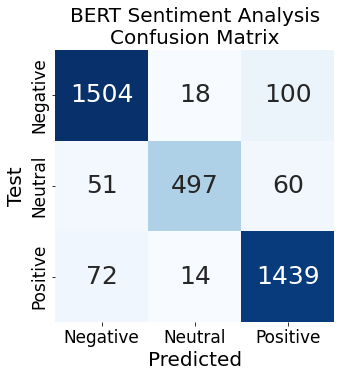

In [63]:
conf_matrix(y_test.argmax(1), y_pred_bert.argmax(1),'BERT Sentiment Analysis\nConfusion Matrix')

In [64]:
print('\tClassification Report for BERT:\n\n',classification_report(y_test,y_pred_bert, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for BERT:

               precision    recall  f1-score   support

    Negative       0.92      0.93      0.93      1622
     Neutral       0.94      0.82      0.87       608
    Positive       0.90      0.94      0.92      1525

   micro avg       0.92      0.92      0.92      3755
   macro avg       0.92      0.90      0.91      3755
weighted avg       0.92      0.92      0.92      3755
 samples avg       0.92      0.92      0.92      3755

